##Silahkan kerjakan Final Project mu disini ya ☺️🙏

# **Prediksi Harga Mobile Phone**
Link Dataset: [Here](https://drive.google.com/file/d/1BEzYGaWuiFmXAXtrQLVbFmqCCJ9-GzHK/view?usp=sharing)



Here is the Case:

Seorang calon pembeli smartphone merasa bingung memilih ponsel yang sesuai dengan kebutuhan dan anggarannya. Dengan banyaknya pilihan di pasaran, ia kesulitan membandingkan fitur seperti RAM, kapasitas baterai, kualitas kamera, prosesor, hingga apakah ponsel tersebut mendukung fast charging atau tidak. Untuk membantu pengambilan keputusan, calon pembeli ini memiliki dataset spesifikasi ponsel yang mencakup informasi seperti nama ponsel, perusahaan, rating, spesifikasi teknis (RAM, baterai, kamera, layar, prosesor), dukungan jaringan (3G, 4G, 5G, VoLTE), versi Android, dan harga ponsel.
Sebagai seorang machine learning engineer, kamu akan menggunakan Linear Regression untuk memprediksi harga ponsel berdasarkan spesifikasinya. Dengan menganalisis hubungan antara spesifikasi ponsel dan harga, model ini dapat memperkirakan berapa harga yang wajar untuk ponsel dengan fitur tertentu. Prediksi ini akan membantu calon pembeli membuat keputusan yang lebih tepat, memahami apakah ponsel tersebut worth it dibandingkan dengan spesifikasi yang ditawarkan, serta memudahkan mereka dalam memilih ponsel sesuai kebutuhan dan anggaran.
1.	Name: This column contains the name of the mobile phone.
2.	Rating: This column contains the ratings given to the phone. the minimum rating is 0. and maximum rating is 5.
3.	Spec_score: This column contains the score given to the phone on the basic of its specifications. This minimum value is 0 and maximum value is 100.
4.	No_of_sim: This column contains whether the phone is dual sim, has 3g, 4g, 5g, volte.
5.	RAM: This column contains the information about the RAM of the phone
6.	Battery: This column provides information about battery specification of the phone.
7.	Display: This column contains information about the screen size of the phone.
8.	Camera: This column provides information about the camera, rear and front.
9.	External_Memory: This column contains information whether a device support external memory and
10.	how much.
11.	Android_version: This column tells us about the android version of the phone.
12.	Price: Price of the phone.
13.	Company: The company to which the phone belongs.
14.	Inbuilt_memory: This column provides information about the inbuilt memory of the phone.
15.	fast_charging: It contains whether the device supports fast charging or not. if yes then how much.
16.	Screen_resolution: This describes the screen resolution of the phone.
17.	Processor: This column gives information about the processor of the phone.
18.	Processor_name: This column describes the name of the processor.


### Import library

In [42]:
import time
star_time = time.time()
import pickle
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_recall_curve, auc, matthews_corrcoef
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import shapiro, boxcox
import scipy.stats as stats

# **Data Preparation**

## *Pengumpulan data*

In [49]:
# mengambil dataset dan menampilkan data
df = pd.read_csv("mobile phone price prediction.csv")
# external memory tidak masuk
# company tidak masuk
# android version tidak masuk
# fast charging tidak masuk
df.head(5)

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


## *Identifikasi setiap fitur/kolom*

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   object 
 6   Battery            1370 non-null   object 
 7   Display            1370 non-null   object 
 8   Camera             1370 non-null   object 
 9   External_Memory    1370 non-null   object 
 10  Android_version    927 non-null    object 
 11  Price              1370 non-null   object 
 12  company            1370 non-null   object 
 13  Inbuilt_memory     1351 non-null   object 
 14  fast_charging      1281 non-null   object 
 15  Screen_resolution  1368 non-null   object 
 16  Processor          1342 

In [51]:
for i in df.columns:
  print(df[i].value_counts())
  print("-"*10)

Unnamed: 0
1369    1
0       1
1       1
2       1
3       1
       ..
14      1
13      1
12      1
11      1
10      1
Name: count, Length: 1370, dtype: int64
----------
Name
Realme Narzo N55 (6GB RAM + 128GB)          3
Realme Narzo 70 5G                          2
Realme 12 Pro Plus 5G (8GB RAM + 256GB)     2
Realme 12 Pro Plus 5G (12GB RAM + 256GB)    2
Samsung Galaxy S21 FE (Snapdragon)          2
                                           ..
TCL Ion X                                   1
TCL 30 LE                                   1
TCL 405                                     1
TCL 50 5G                                   1
Samsung Galaxy F23                          1
Name: count, Length: 1334, dtype: int64
----------
Rating
4.15    98
4.65    94
4.40    94
4.30    93
4.55    93
4.35    88
4.50    87
4.45    86
4.60    86
4.00    85
4.70    78
4.75    77
4.10    76
4.25    75
4.05    74
4.20    73
3.95     8
3.90     3
3.75     1
3.85     1
Name: count, dtype: int64
----------
Sp

In [52]:
# mencari tau data type dan indentifikasi setiap fitur dan kolom
df.value_counts("Rating")
df.value_counts("Spec_score")
df.value_counts("No_of_sim")
df.value_counts("Ram")
df.value_counts("Battery")
df.value_counts("Display")
df.value_counts("Camera")
df.value_counts("Screen_resolution")
df.value_counts("Processor")
df.value_counts("Processor_name")
# terdapat data yang error pada kolom: Ram, Battery

Processor_name
Snapdragon 8+ Gen1    58
Snapdragon 8 Gen2     55
Snapdragon 8 Gen3     44
Snapdragon 695        36
Snapdragon 680        34
                      ..
Snapdragon 888+        1
Snapdragon MSM8937     1
Snapdragon SM4375      1
Unisoc T610            1
 Dimensity 7030        1
Name: count, Length: 276, dtype: int64

In [53]:
print(df['Price'].unique())

['9,999' '9,990' '11,999' '11,990' '11,599' '12,298' '14,999' '14,990'
 '14,949' '19,999' '19,990' '19,799' '19,499' '18,999' '18,990' '20,999'
 '29,999' '28,990' '30,500' '30,999' '39,999' '39,990' '38,900' '37,999'
 '41,289' '41,790' '42,990' '42,999' '49,999' '49,990' '49,000' '47,990'
 '44,999' '44,990' '51,999' '54,990' '54,999' '59,999' '57,990' '64,999'
 '65,690' '69,990' '69,999' '70,000' '1,99,990' '1,84,999' '1,79,990'
 '1,77,999' '1,64,999' '1,59,999' '1,54,999' '1,39,999' '1,30,376'
 '1,29,999' '6,990' '6,999' '7,499' '7,999' '8,033' '8,199' '8,490'
 '9,499' '10,199' '10,499' '11,899' '11,580' '11,490' '11,390' '10,999'
 '12,350' '12,490' '15,050' '29,990' '29,799' '30,739' '31,398' '31,990'
 '38,990' '38,799' '37,990' '40,990' '49,940' '48,990' '46,990' '45,990'
 '45,210' '50,999' '56,990' '58,990' '62,990' '63,999' '64,990' '65,490'
 '71,990' '74,899' '76,990' '79,999' '80,990' '1,39,990' '1,18,990'
 '1,15,990' '1,13,990' '1,10,990' '1,09,990' '1,07,990' '1,06,990'
 '99,9

In [54]:
# cek baris dan kolom
df.shape

(1370, 18)

## *Mendeskripsikan data*

In [55]:
# mendeskripsikan data number(float dan integer)
df.describe()

,Unnamed: 0,Rating,Spec_score
count,1370.000000,1370.000000,1370.000000
mean,684.500000,4.374416,80.234307
std,395.629246,0.230176,8.373922
min,0.000000,3.750000,42.000000
25%,342.250000,4.150000,75.000000
50%,684.500000,4.400000,82.000000
75%,1026.750000,4.550000,86.000000
max,1369.000000,4.750000,98.000000


In [56]:
# mendeskripsikan data object
df.describe(include='object')

,Name,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
count,1370,1370,1370,1370,1370,1370,1370,927,1370,1370,1351,1281,1368,1342,1370
unique,1334,9,16,89,89,347,85,23,449,26,10,38,141,14,276
top,Realme Narzo N55 (6GB RAM + 128GB),"Dual Sim, 3G, 4G, 5G, VoLTE,",8 GB RAM,5000 mAh Battery,6.7 inches,50 MP + 2 MP Dual Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"29,990",Vivo,128 GB inbuilt,18W Fast Charging,1080 x 2400 px,Octa Core,Snapdragon 8+ Gen1
freq,3,818,528,693,158,81,233,280,37,186,644,157,357,1237,58


## *Identifikasi missing value*

In [57]:
# identifikasi missing value
df.isnull().sum()

Unnamed: 0             0
Name                   0
Rating                 0
Spec_score             0
No_of_sim              0
Ram                    0
Battery                0
Display                0
Camera                 0
External_Memory        0
Android_version      443
Price                  0
company                0
Inbuilt_memory        19
fast_charging         89
Screen_resolution      2
Processor             28
Processor_name         0
dtype: int64

## *Identifikasi outlier*

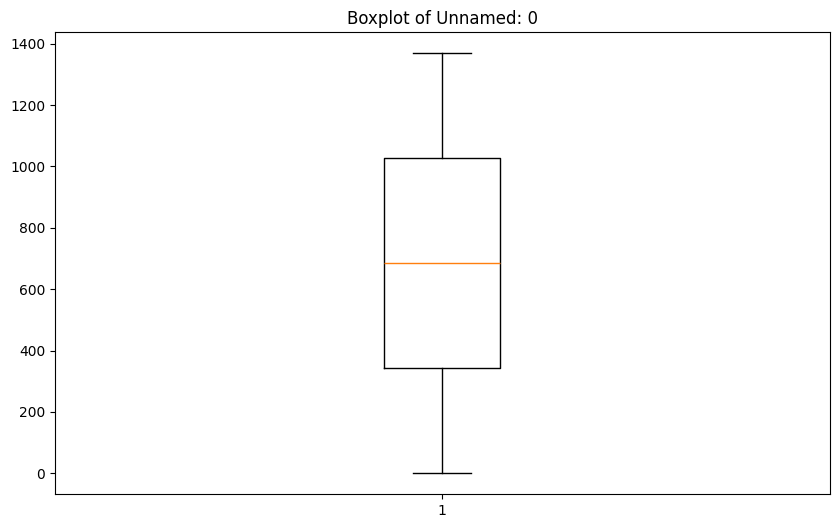

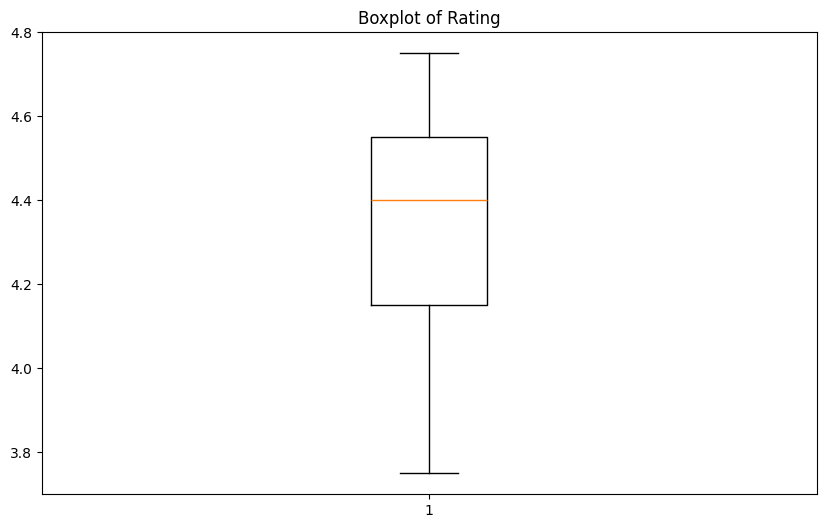

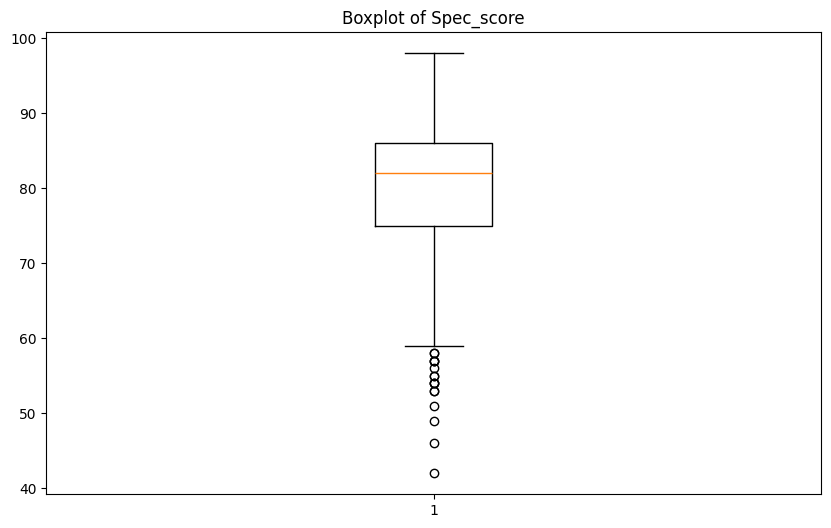

In [58]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
  plt.figure(figsize=(10, 6))
  plt.boxplot(df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()

## *Identifikasi data duplicate*

In [59]:
df.duplicated().sum()

np.int64(0)

## *Univariate, Bivariate, dan Multivariate Analysis*

### Univariate analysis

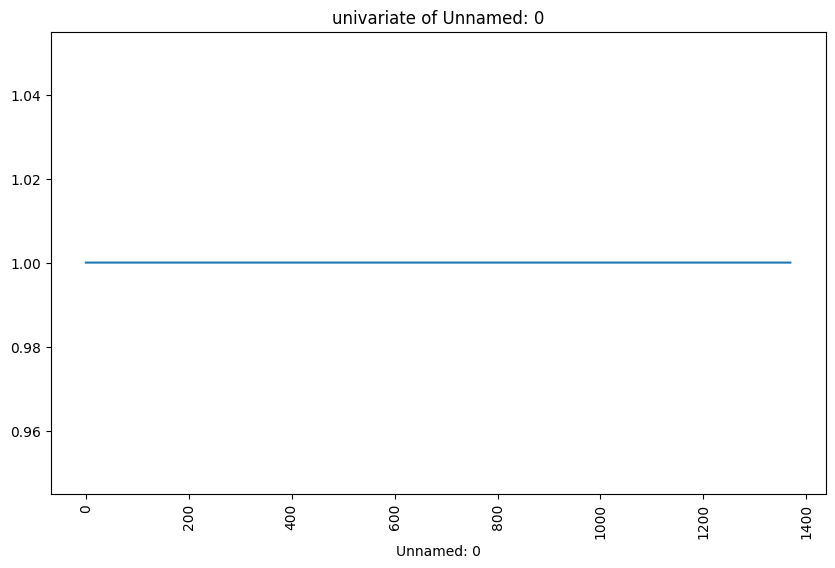

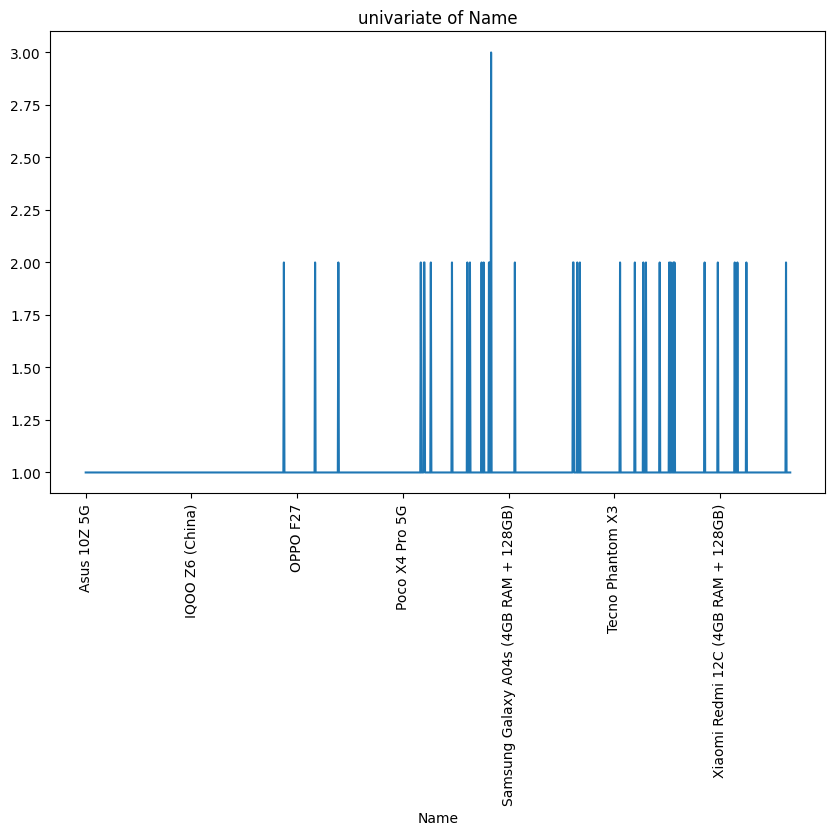

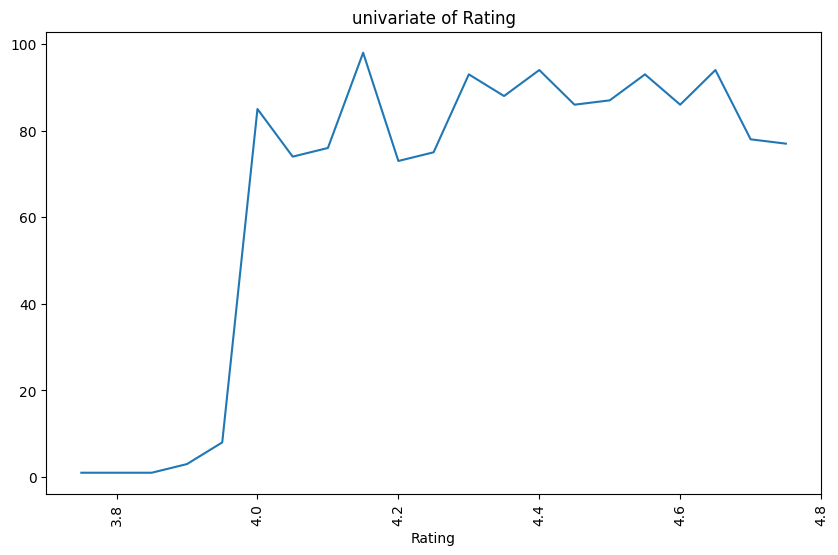

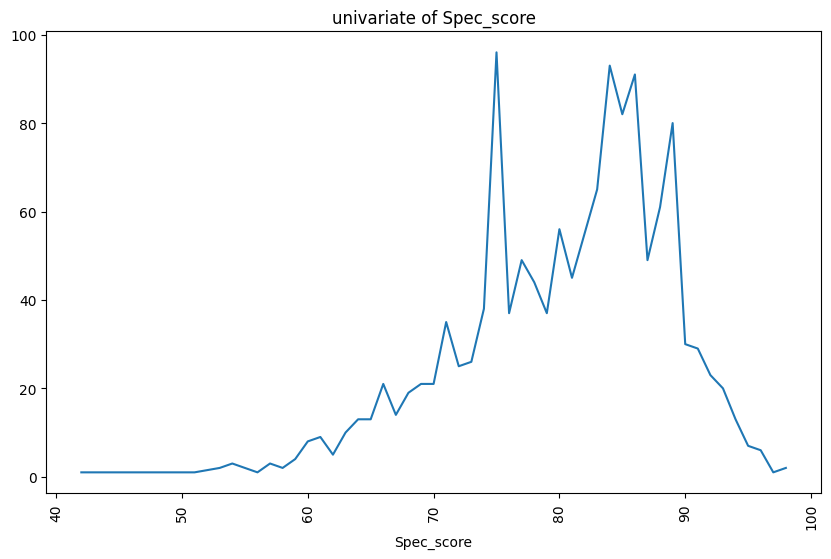

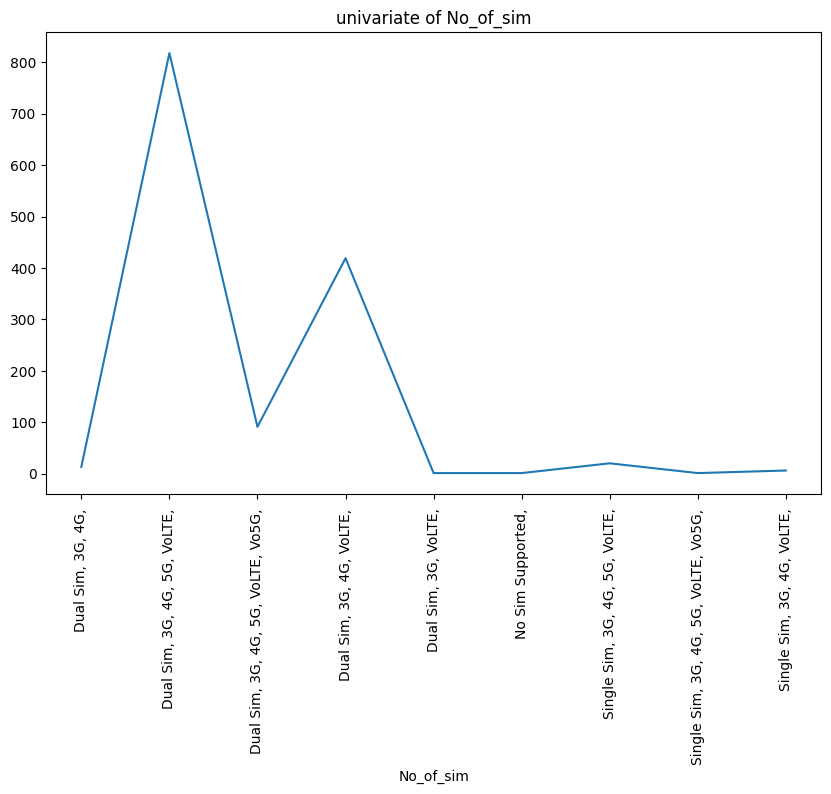

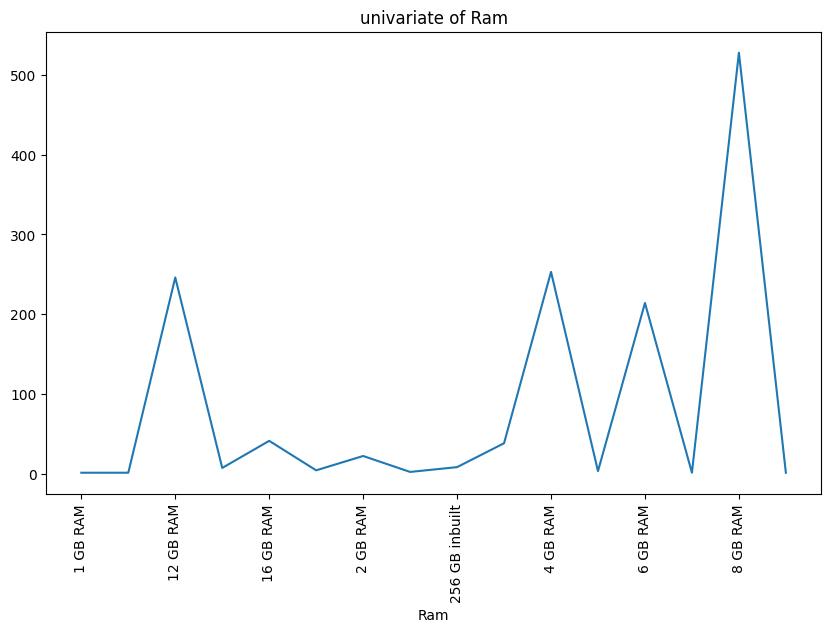

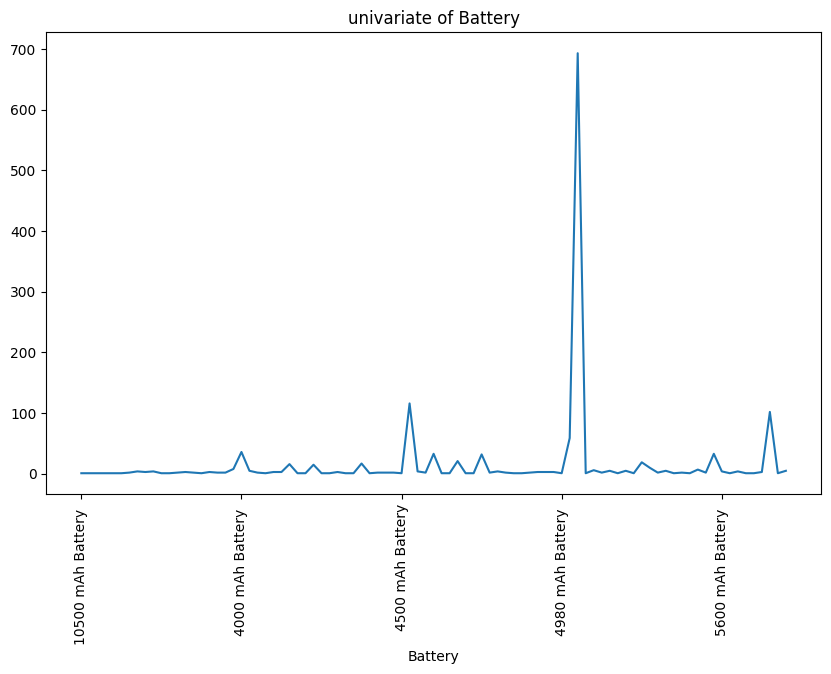

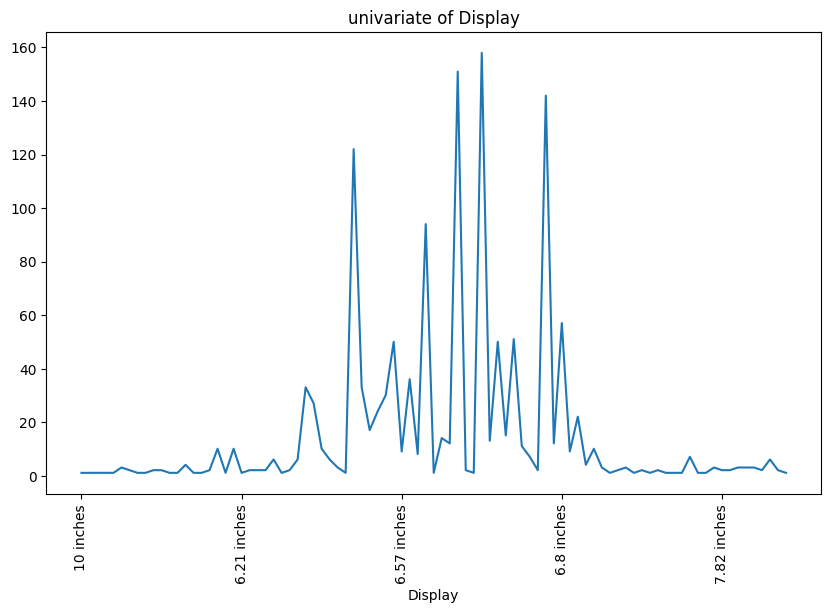

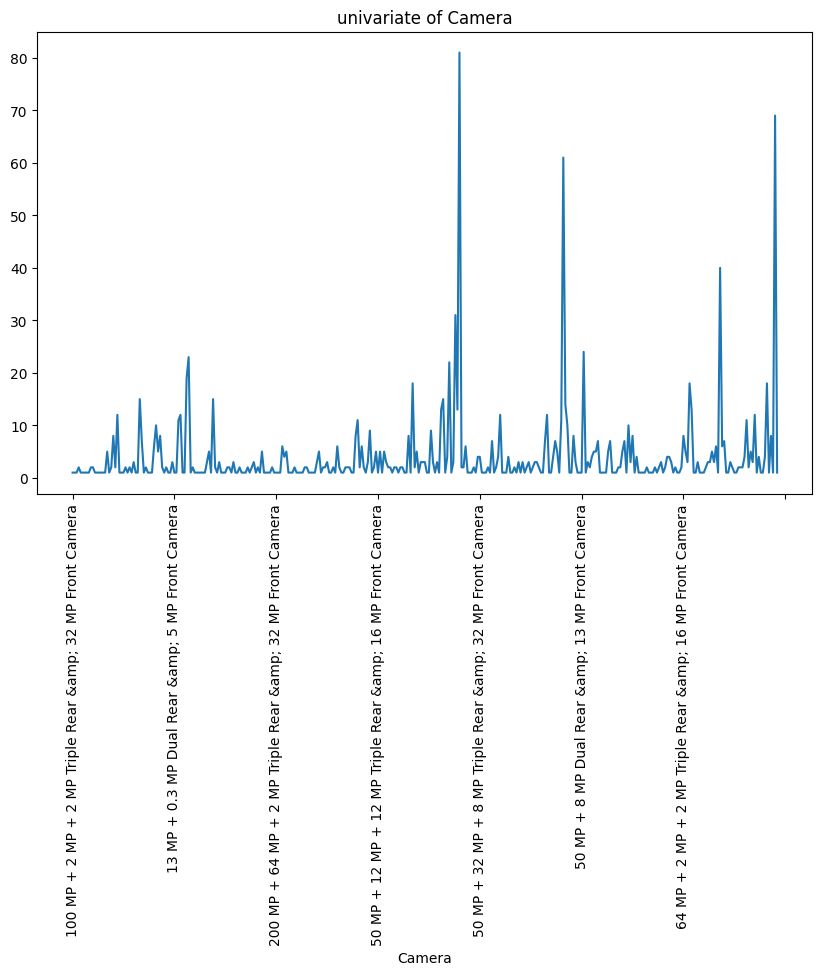

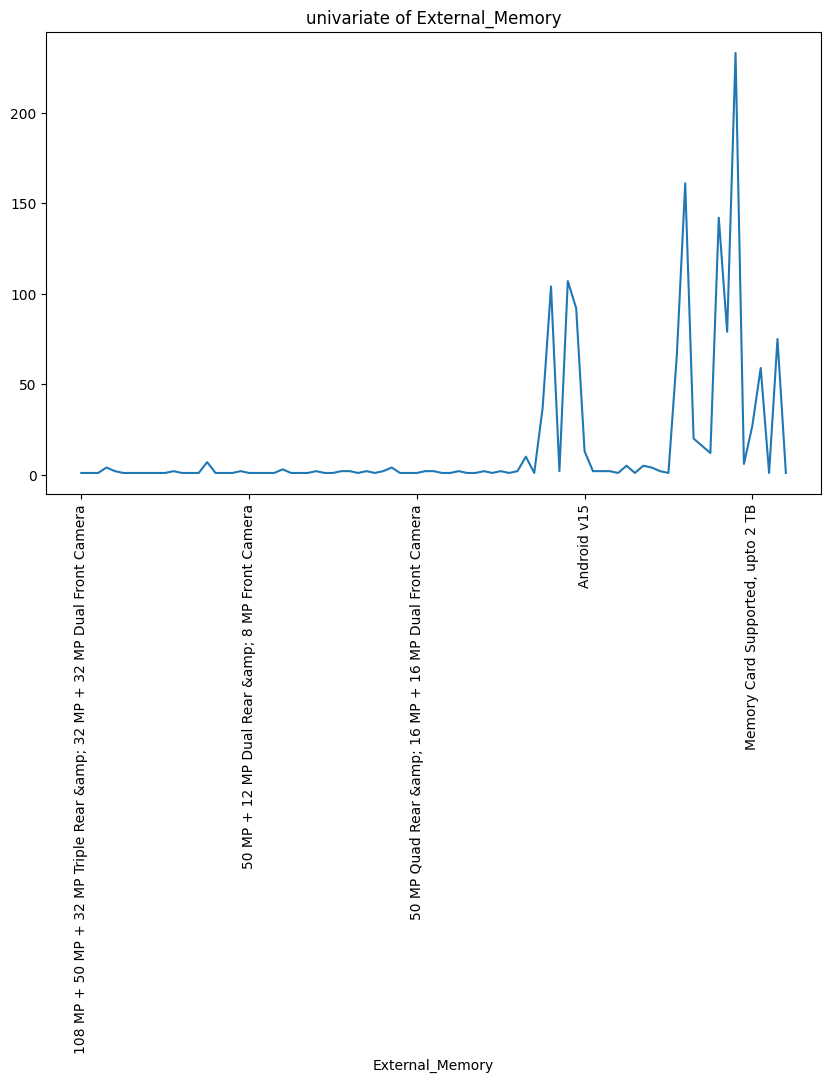

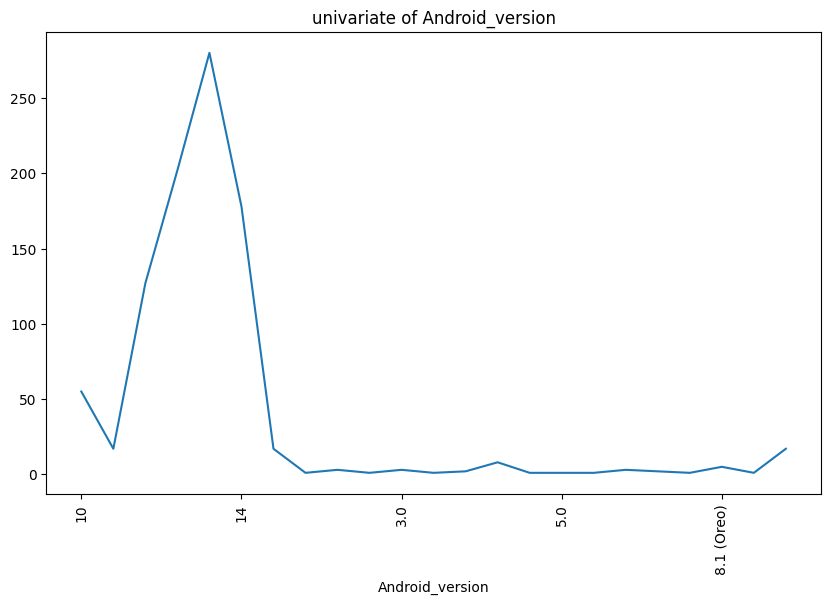

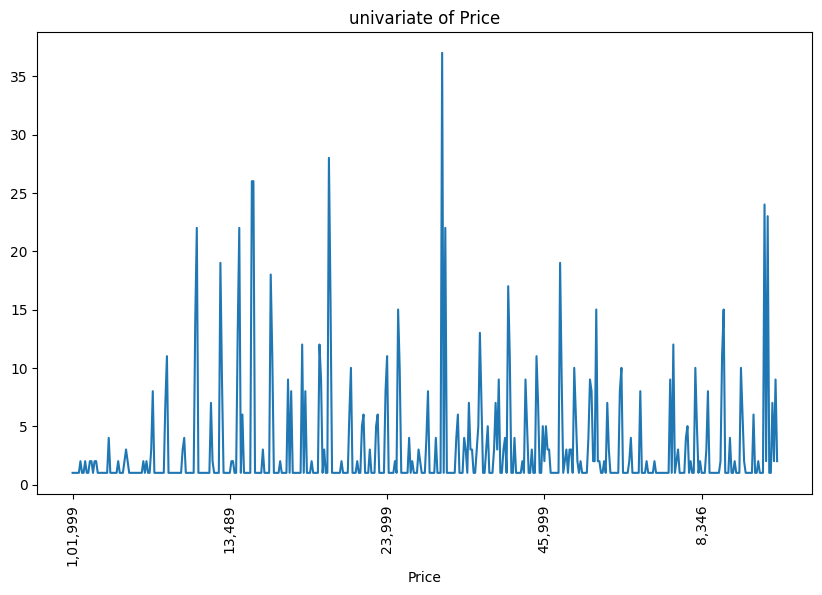

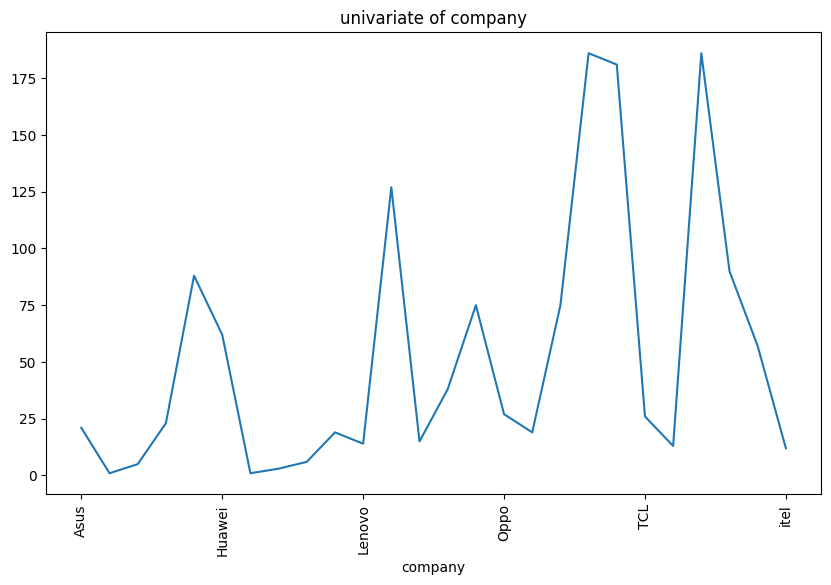

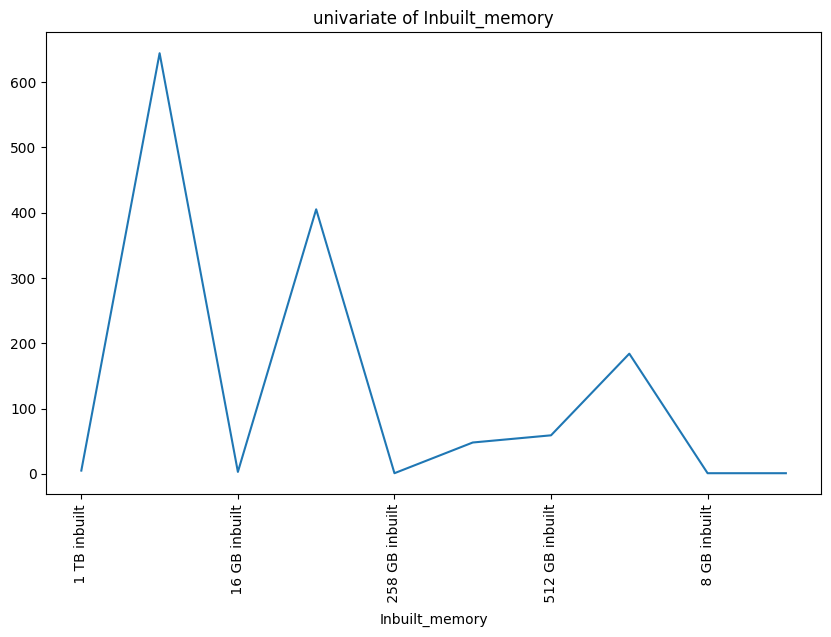

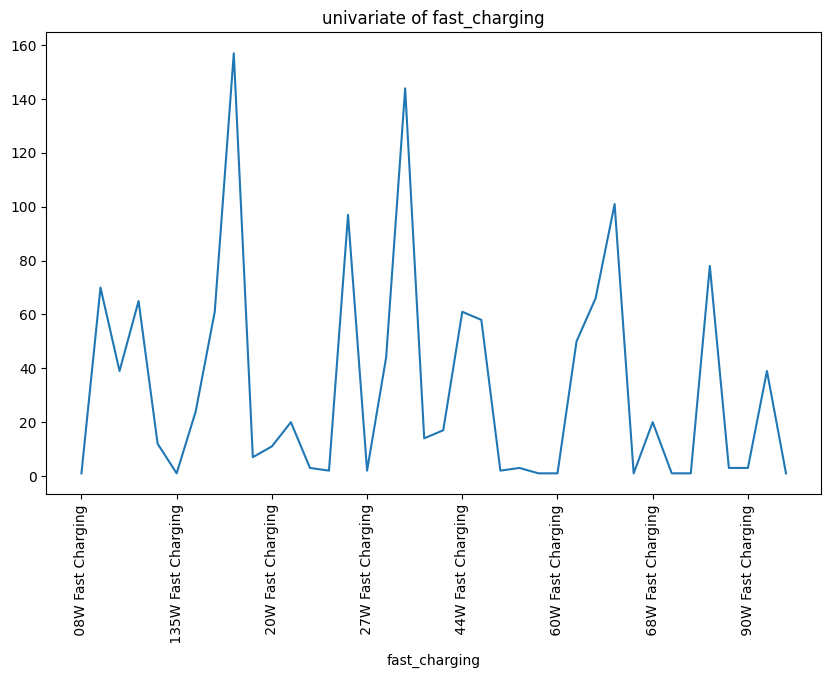

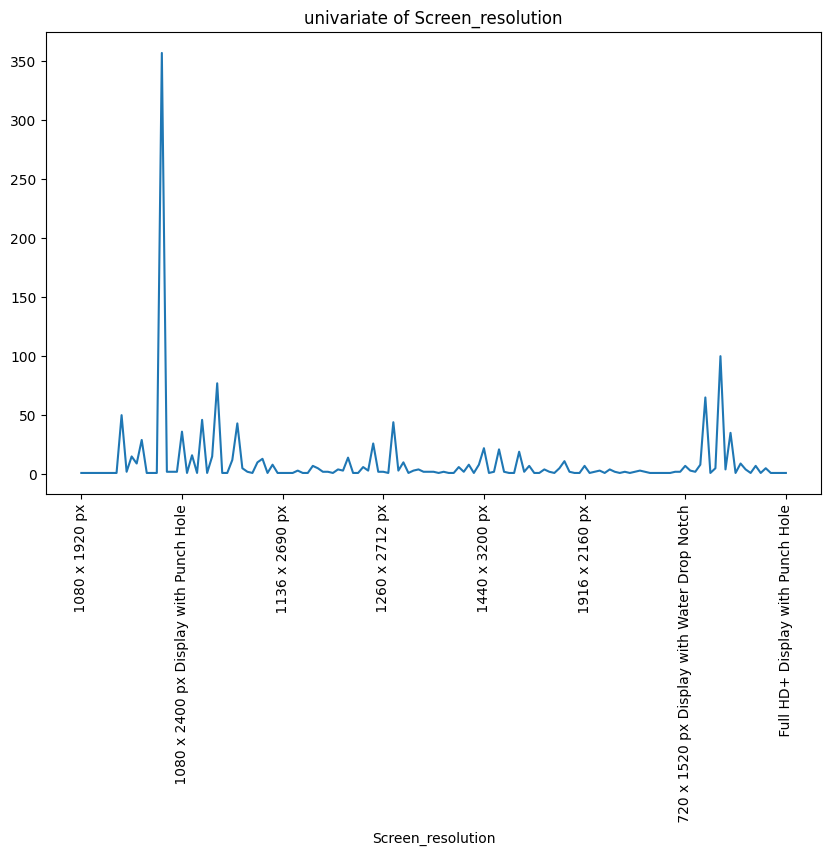

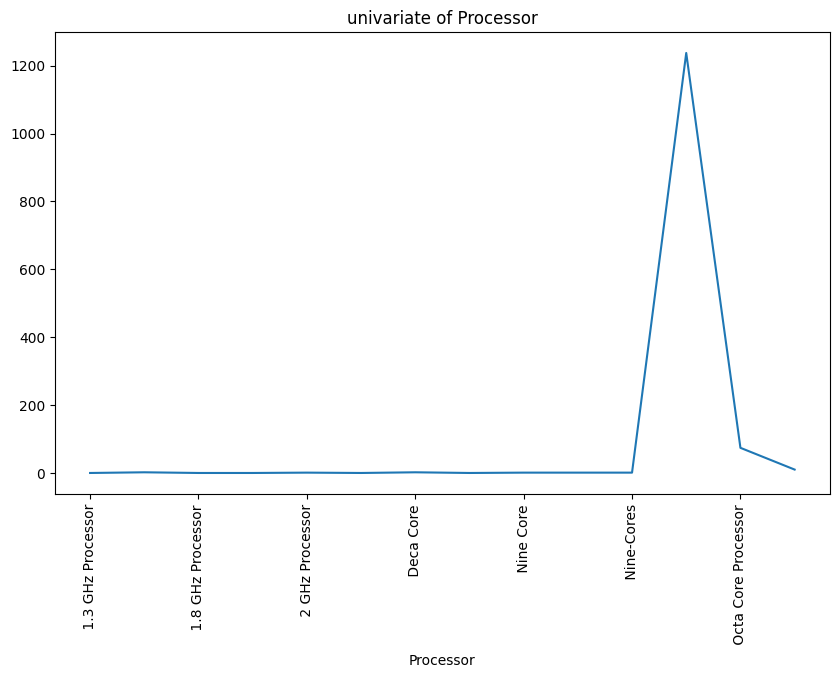

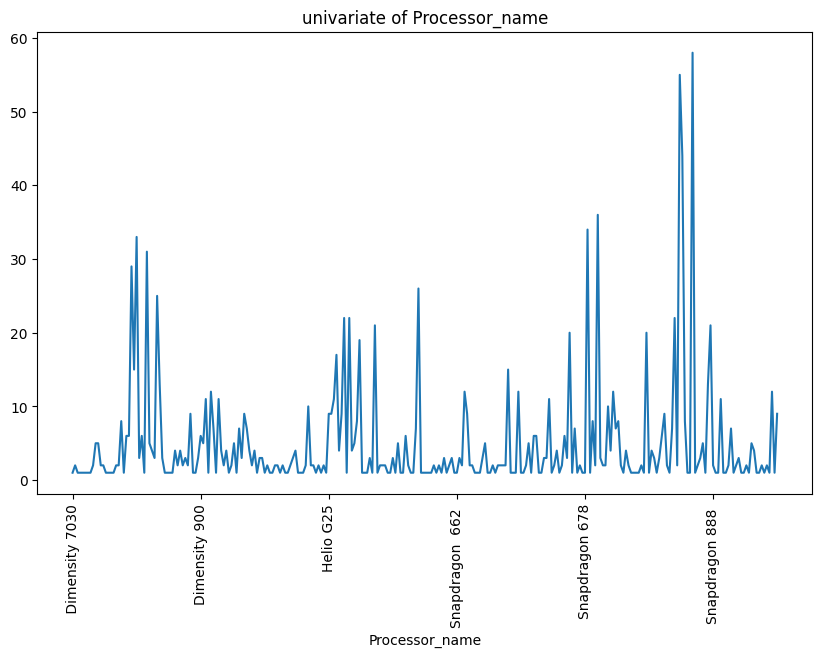

In [60]:
# univariate dilakukan terhadap setiap feature
for column in df.columns:
  plt.figure(figsize=(10, 6))
  df[column].value_counts().sort_index().plot(kind='line')
  plt.title(f'univariate of {column}')
  plt.xticks(rotation=90)
  plt.show()

### bivariate analysis

<Axes: >

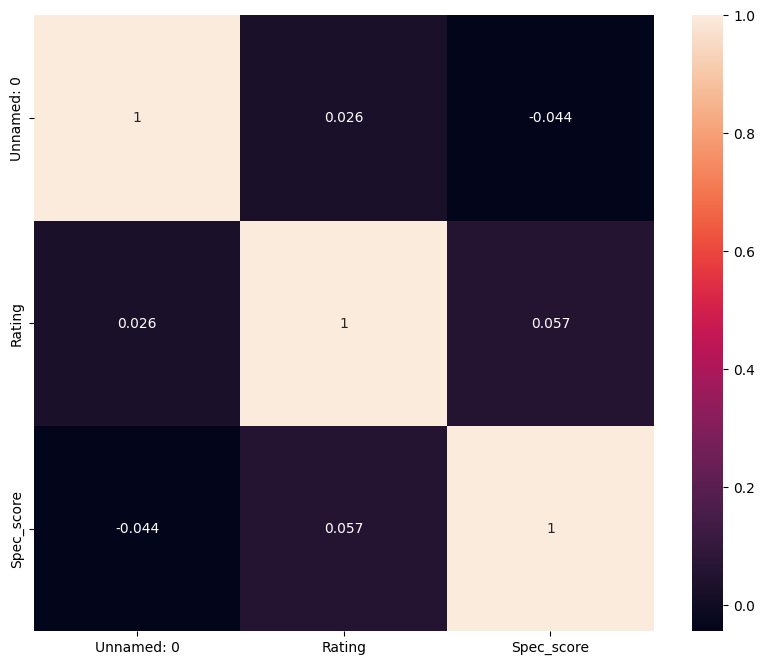

In [61]:
# bivariate analysis
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)

### multivariate analysis

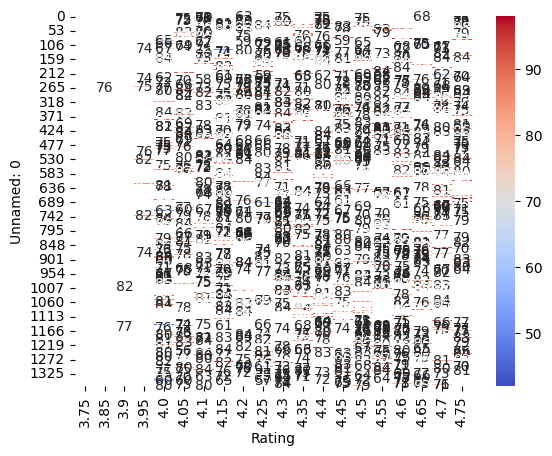

In [62]:
#multivariate Analysis
result = pd.pivot_table(data=df, index = 'Unnamed: 0',columns = 'Rating', values = 'Spec_score')
sns.heatmap(result, annot=True, cmap='coolwarm')
plt.show()

# **Data Pre-Processing**

kolom 'company', 'Andorid_version', 'External_Memory', 'fast_charging' kita drop karena tidak di gunakan

In [85]:
df_fe = df.drop(columns=['company', 'Android_version', 'External_Memory', 'fast_charging'], axis=1, inplace=False)
df_fe.head(5)


,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,Price,Inbuilt_memory,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"9,999",128 GB inbuilt,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"9,990",32 GB inbuilt,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"11,999",64 GB inbuilt,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"11,999",64 GB inbuilt,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"11,999",64 GB inbuilt,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


tujuan dari kita akan membuat sebuah prediksi apakah sebuah ponsel worth it terhadap spesifikasi yang diberikan

## *Mengidentifikasi Mean-Median-Modus*

In [86]:
df_numerical = df_fe.select_dtypes(include=[np.number])

for i in df_numerical.columns:
  print(f'Mean {i} : {df_numerical[i].mean()}')
  print(f'Median {i} : {df_numerical[i].median()}')
  print(f'Modus {i} : {df_numerical[i].mode()[0]}')

Mean Unnamed: 0 : 684.5
Median Unnamed: 0 : 684.5
Modus Unnamed: 0 : 0
Mean Rating : 4.374416058394161
Median Rating : 4.4
Modus Rating : 4.15
Mean Spec_score : 80.23430656934306
Median Spec_score : 82.0
Modus Spec_score : 75


## *Handling Dirty Data*

### cek data null dan duplikat

In [87]:
df_fe.isnull().sum()

Unnamed: 0            0
Name                  0
Rating                0
Spec_score            0
No_of_sim             0
Ram                   0
Battery               0
Display               0
Camera                0
Price                 0
Inbuilt_memory       19
Screen_resolution     2
Processor            28
Processor_name        0
dtype: int64

In [88]:
df_fe.drop_duplicates()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,Price,Inbuilt_memory,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"9,999",128 GB inbuilt,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"9,990",32 GB inbuilt,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"11,999",64 GB inbuilt,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"11,999",64 GB inbuilt,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"11,999",64 GB inbuilt,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,1365,TCL 40R,4.05,75,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"18,999",64 GB inbuilt,720 x 1612 px,Octa Core,Dimensity 700 5G
1366,1366,TCL 50 XL NxtPaper 5G,4.10,80,"Dual Sim, 3G, 4G, VoLTE,",8 GB RAM,5000 mAh Battery,6.8 inches,50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera,"24,990",128 GB inbuilt,1200 x 2400 px,Octa Core,Dimensity 7050
1367,1367,TCL 50 XE NxtPaper 5G,4.00,80,"Dual Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera,"23,990",256 GB inbuilt,720 x 1612 px,Octa Core,Dimensity 6080
1368,1368,TCL 40 NxtPaper 5G,4.50,79,"Dual Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"22,499",256 GB inbuilt,720 x 1612 px,Octa Core,Dimensity 6020


### replace data null, error, dan dirubah ke int

data null dan error kita isi dengan modus

In [89]:
# membuat fungsi dan variabel yang memudahkan dalam mengganti data yang tidak sesuai dan error
Ram_regex = r"^(\d+) GB RAM"
Battery_regex = r"^(\d+) mAh Battery\s*$"
Display_regex = r"^(\d+) inches\s*$"
Memory_regex = r"^(\d+) GB inbuilt\s*$"

def Empety_Column_value(value, y):
  if re.match(y, str(value)):
    return value
  else:
    return np.nan


###terdapat data yang tidak sesuai dalam kolom Ram, maka dari itu kita ubah dan isi dengan

In [90]:
df_fe['Ram'] = df_fe['Ram'].apply(lambda x: Empety_Column_value(x, Ram_regex))
df_fe['Ram'] = df_fe['Ram'].replace(np.nan, df_fe['Ram'].mode()[0])
df_fe['Ram'] = df_fe['Ram'].str.replace(' GB RAM', '')
df_fe['Ram'] = df_fe['Ram'].astype(int)
df_fe['Ram'].value_counts()

Ram
8     549
4     253
12    246
6     214
16     41
3      38
2      22
18      4
24      2
1       1
Name: count, dtype: int64

###terdapat data yang tidak sesuai dalam kolom Battery, maka dari itu kita ubah dan isi dengan modus

In [91]:
df_fe['Battery'].unique()


array(['6000 mAh Battery ', '4000 mAh Battery ', '5000 mAh Battery ',
       '6000 mAh Battery', '3500 mAh Battery', '4500 mAh Battery ',
       '3400 mAh Battery ', '3300 mAh Battery ', '4050 mAh Battery ',
       '3900 mAh Battery ', '4300 mAh Battery ', '4800 mAh Battery ',
       '4200 mAh Battery ', '3700 mAh Battery ', '4400 mAh Battery ',
       '3500 mAh Battery ', '4320 mAh Battery ', '4030 mAh Battery',
       '1900 mAh Battery', '5000 mAh Battery', '2650 mAh Battery',
       '3000 mAh Battery', '4600 mAh Battery ', '4100 mAh Battery ',
       '5500 mAh Battery ', '4830 mAh Battery ', '4700 mAh Battery ',
       '4810 mAh Battery ', '5100 mAh Battery ', '5400 mAh Battery ',
       '4870 mAh Battery ', '5700 mAh Battery ', '4730 mAh Battery ',
       '5100 mAh Battery', '6 GB RAM, 64 GB inbuilt', '5200 mAh Battery ',
       '5240 mAh Battery ', '5050 mAh Battery ', '4310 mAh Battery ',
       '4350 mAh Battery ', '4880 mAh Battery ', '4520 mAh Battery ',
       '4260 mAh Batte

In [92]:
df_fe['Battery'].unique()
df_fe['Battery'] = df_fe['Battery'].apply(lambda x: Empety_Column_value(x, Battery_regex))
df_fe['Battery'] = df_fe['Battery'].replace(np.nan, df_fe['Battery'].mode()[0])
df_fe['Battery'] = df_fe['Battery'].str.replace(' mAh Battery', '')
df_fe['Battery'] = df_fe['Battery'].astype(int)

###terdapat data yang tidak sesuai dalam kolom Display, maka dari itu kita ubah dan isi dengan modus

In [93]:
df_fe['Display'].unique()

array(['6.6 inches', '6.4 inches', '6.5 inches', '6.1 inches',
       '6.7 inches', '6.21 inches', '6.67 inches', '6.58 inches',
       '6.71 inches', '6.78 inches', '6.8 inches', '6.56 inches',
       '6.3 inches', '7.45 inches', '6.2 inches', '8.2 inches',
       '7.6 inches', '8 inches', '7.63 inches', '6.22 inches',
       '4.5 inches', '6.51 inches', '6.53 inches', '6.35 inches',
       '6.55 inches', '6.64 inches', '5.2 inches', '5.5 inches',
       '6.72 inches', '6.44 inches', '6.82 inches', '6.68 inches',
       '7 inches', '6.74 inches', '8.03 inches', '8.02 inches',
       '7.8 inches', '6.52 inches', '6.59 inches', '6.43 inches',
       '4300 mAh Battery with 30W Fast Charging', '6.62 inches',
       '6.57 inches', '6.73 inches', '6.83 inches', '7.1 inches',
       '7.4 inches', '7.56 inches', '7.82 inches', '6.38 inches',
       '6.79 inches', '6.61 inches', '6.69 inches', '12.1 inches',
       '6.77 inches', '6.75 inches', '6.81 inches', '7.2 inches',
       '7.71 inches'

In [94]:
display_raw = df_fe['Display'].astype(str)
display_clean = display_raw.str.extract(r'(\d+\.?\d*)')[0]
mode_display = display_clean.dropna().astype(float).mode()[0]
display_clean = display_clean.fillna(mode_display).astype(float)
df_fe['Display'] = display_clean
df_fe['Display'].value_counts()

Display
6.70     158
6.67     151
6.78     142
6.50     122
6.60      94
        ... 
7.11       1
48.00      1
6.94       1
7.09       1
10.00      1
Name: count, Length: 89, dtype: int64

###terdapat data yang tidak sesuai dalam kolom Inbuilt_memory, maka dari itu kita ubah dan isi dengan modus

In [95]:
df_fe['Inbuilt_memory'] = df_fe['Inbuilt_memory'].replace(' Octa Core', df_fe['Inbuilt_memory'].mode()[0])
df_fe['Inbuilt_memory'] = df_fe['Inbuilt_memory'].replace(np.nan, df_fe['Inbuilt_memory'].mode()[0])
df_fe['Inbuilt_memory'] = df_fe['Inbuilt_memory'].str.replace('1 TB inbuilt', '1024 GB inbuilt')
df_fe['Inbuilt_memory'] = df_fe['Inbuilt_memory'].str.replace(' GB inbuilt', '')
df_fe['Inbuilt_memory'] = df_fe['Inbuilt_memory'].astype(int)

###dalam kolom NO_of_sim tidak terdapat nilai yang tidak normal

In [96]:
df_fe['No_of_sim'].unique()

array(['Dual Sim, 3G, 4G, 5G, VoLTE, ', 'Dual Sim, 3G, 4G, VoLTE, ',
       'Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, ',
       'Single Sim, 3G, 4G, 5G, VoLTE, ', 'Dual Sim, 3G, 4G, ',
       'Single Sim, 3G, 4G, VoLTE, ', 'No Sim Supported, ',
       'Single Sim, 3G, 4G, 5G, VoLTE, Vo5G, ', 'Dual Sim, 3G, VoLTE, '],
      dtype=object)

###dalam kolom camera terdapat nilai yang tidak normal

In [97]:
df_fe['Camera'].unique()
# df_fe['Camera'].info()

array(['50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera',
       '13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Front Camera',
       '50 MP Quad Rear &amp; 8 MP Front Camera',
       '48 MP Quad Rear &amp; 13 MP Front Camera',
       '13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Front Camera',
       '50 MP + 2 MP Dual Rear &amp; 5 MP Front Camera',
       '48 MP + 8 MP + 5 MP Triple Rear &amp; 20 MP Front Camera',
       '48 MP Quad Rear &amp; 8 MP Front Camera',
       '50 MP + 2 MP + 2 MP Triple Rear &amp; 13 MP Front Camera',
       '50 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Front Camera',
       '50 MP + 8 MP + 2 MP Triple Rear &amp; 13 MP Front Camera',
       '50 MP + 8 MP + 2 MP Triple Rear &amp; 8 MP Front Camera',
       '48 MP + 8 MP + 5 MP Triple Rear &amp; 25 MP Front Camera',
       '50 MP + 13 MP + 2 MP Triple Rear &amp; 32 MP Front Camera',
       '64 MP Quad Rear &amp; 20 MP Front Camera',
       '64 MP + 8 MP + 5 MP Triple Rear &amp; 32 MP Front Camera',
       '13 MP + 

In [98]:
df_fe['Camera'] = df_fe['Camera'].str.replace(r'(?i)^((?!MP).)*$', '', regex=True)
df_fe['Camera'] = df_fe['Camera'].replace('', np.nan)
df_fe['Camera'] = df_fe['Camera'].fillna(df_fe['Camera'].mode()[0])
df_fe['Camera']

0         50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera
1       13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...
2                 50 MP Quad Rear &amp; 8 MP Front Camera
3                48 MP Quad Rear &amp; 13 MP Front Camera
4       13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...
                              ...                        
1365    50 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...
1366      50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera
1367      50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera
1368    50 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...
1369       50 MP + 2 MP Dual Rear &amp; 8 MP Front Camera
Name: Camera, Length: 1370, dtype: object

###screen_resolution

In [99]:
df_fe['Screen_resolution'] = df_fe['Screen_resolution'].str.replace(r'(?i)^((?!px).)*$', '', regex=True)
df_fe['Screen_resolution'] = df_fe['Screen_resolution'].replace('', np.nan)
df_fe['Screen_resolution'] = df_fe['Screen_resolution'].fillna(df_fe['Screen_resolution'].mode()[0])
df_fe['Screen_resolution'].unique()
df_fe['Screen_resolution'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1370 entries, 0 to 1369
Series name: Screen_resolution
Non-Null Count  Dtype 
--------------  ----- 
1370 non-null   object
dtypes: object(1)
memory usage: 10.8+ KB


###Processor

In [100]:
df_fe['Processor'] = df_fe['Processor'].str.replace(' 128 GB inbuilt', '')
df_fe['Processor'] = df_fe['Processor'].replace('', np.nan)
df_fe['Processor'] = df_fe['Processor'].fillna(df_fe['Processor'].mode()[0])

###Processor Name

In [101]:
# df_fe['Processor_name'] = df_fe['Processor_name'].str.replace(' 128 GB inbuilt', '')
# df_fe['Processor_name'] = df_fe['Processor_name'].replace('', np.nan)
df_fe['Processor_name'].unique()

array(['Exynos 1330', 'Octa Core', 'Helio G88', 'Helio P35',
       'Dimensity 700', 'Exynos 9611', 'Exynos  850', 'Exynos 1280',
       'Snapdragon 695', 'Exynos 850', 'Helio P65', 'Octa Core Processor',
       'Snapdragon 680', 'Helio G80', 'Samsung Exynos 7884',
       'Dimensity 6100 Plus', 'Dimensity 700 5G', 'Snapdragon  680',
       'Snapdragon 888', 'Exynos 1380', 'Snapdragon 865', 'Exynos 980',
       'Snapdragon 730', 'Snapdragon 675', 'Snapdragon 7 Gen1',
       'Snapdragon 750G', 'Snapdragon 855+', 'Snapdragon 870',
       'Snapdragon 710', 'Exynos 1480', 'Snapdragon  720G ',
       'Snapdragon 778g', 'Exynos 2200', 'Snapdragon 7+ Gen2',
       'Snapdragon 8 Gen 2', 'Exynos 9825', 'Snapdragon 7s Gen2',
       'Exynos 2100', 'Dimensity 1300', 'Snapdragon 778G+',
       'Snapdragon 778G', 'Exynos 2300', 'Snapdragon 8+ Gen1',
       'Snapdragon 8 Gen3', 'Snapdragon  8+ Gen1', 'Snapdragon  8 Gen1',
       'Exynos 990', 'Snapdragon 855', 'Exynos 8895', 'Exynos  2100',
       'Ex

### Cek outlier dan deskripsi data

In [102]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   int64  
 6   Battery            1370 non-null   int64  
 7   Display            1370 non-null   float64
 8   Camera             1370 non-null   object 
 9   Price              1370 non-null   object 
 10  Inbuilt_memory     1370 non-null   int64  
 11  Screen_resolution  1370 non-null   object 
 12  Processor          1370 non-null   object 
 13  Processor_name     1370 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 150.0+ KB


Cek kembali jumlah outlier

In [103]:
df_fe_numerical = df_fe.select_dtypes(include=[np.number])
def cek_jumlah_outlier(df, threshold_skew=0.5, z_thresh=3):
    outlier_summary = {}

    numerical_cols = df.select_dtypes(include=[np.number]).columns

    for col in numerical_cols:
        if df[col].isnull().sum() == len(df[col]):
            continue  # Skip kolom kosong semua

        skewness = df[col].skew()

        if abs(skewness) > threshold_skew:
            # Gunakan IQR
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower) | (df[col] > upper)]
        else:
            # Gunakan Z-score
            z_scores = (df[col] - df[col].mean()) / df[col].std()
            outliers = df[(z_scores < -z_thresh) | (z_scores > z_thresh)]

        outlier_summary[col] = len(outliers)

    return pd.Series(outlier_summary, name="jumlah_outlier").sort_values(ascending=False)

outlier_report = cek_jumlah_outlier(df_fe_numerical)
print(outlier_report)


Ram               316
Display            97
Inbuilt_memory     64
Battery            20
Spec_score         17
Rating              0
Unnamed: 0          0
Name: jumlah_outlier, dtype: int64


In [104]:
df_fe[df_fe_numerical.columns] = df_fe_numerical

In [105]:
df_fe.select_dtypes(include=np.number).describe()

,Unnamed: 0,Rating,Spec_score,Ram,Battery,Display,Inbuilt_memory
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,684.500000,4.374416,80.234307,7.718978,4928.235766,9.827810,173.449635
std,395.629246,0.230176,8.373922,3.204590,544.881863,115.998793,113.977498
min,0.000000,3.750000,42.000000,1.000000,1900.000000,4.500000,8.000000
25%,342.250000,4.150000,75.000000,6.000000,4800.000000,6.550000,128.000000
50%,684.500000,4.400000,82.000000,8.000000,5000.000000,6.670000,128.000000
75%,1026.750000,4.550000,86.000000,8.000000,5000.000000,6.740000,256.000000
max,1369.000000,4.750000,98.000000,24.000000,10500.000000,4300.000000,1024.000000


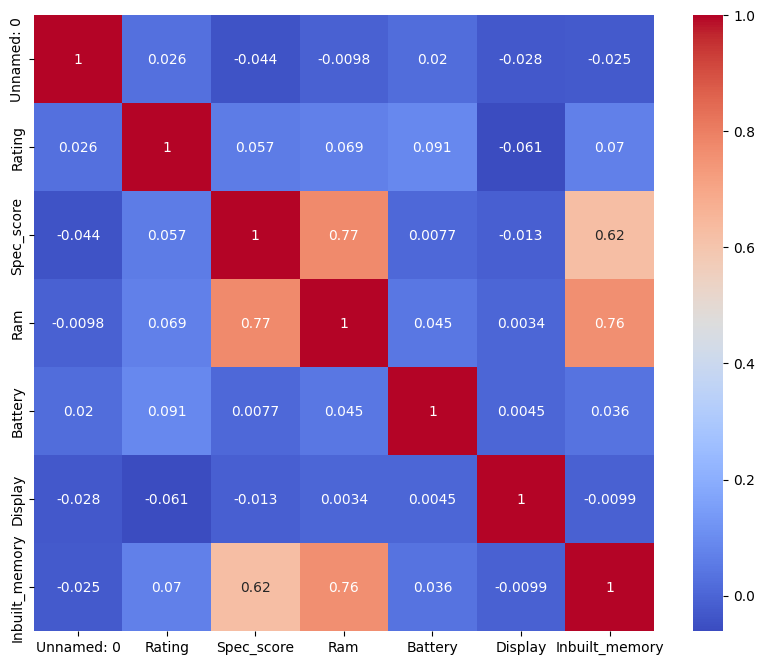

In [106]:
corr_matrix = df_fe.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# **Feature Enginering**

In [107]:
df_fe = df_fe.drop(columns=['Unnamed: 0', 'Name', 'Processor'])

In [108]:
df = df_fe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             1370 non-null   float64
 1   Spec_score         1370 non-null   int64  
 2   No_of_sim          1370 non-null   object 
 3   Ram                1370 non-null   int64  
 4   Battery            1370 non-null   int64  
 5   Display            1370 non-null   float64
 6   Camera             1370 non-null   object 
 7   Price              1370 non-null   object 
 8   Inbuilt_memory     1370 non-null   int64  
 9   Screen_resolution  1370 non-null   object 
 10  Processor_name     1370 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 117.9+ KB


In [109]:
df['Price'] = df['Price'].str.replace(',', '', regex=True)
df['Price'] = df['Price'].astype(int)

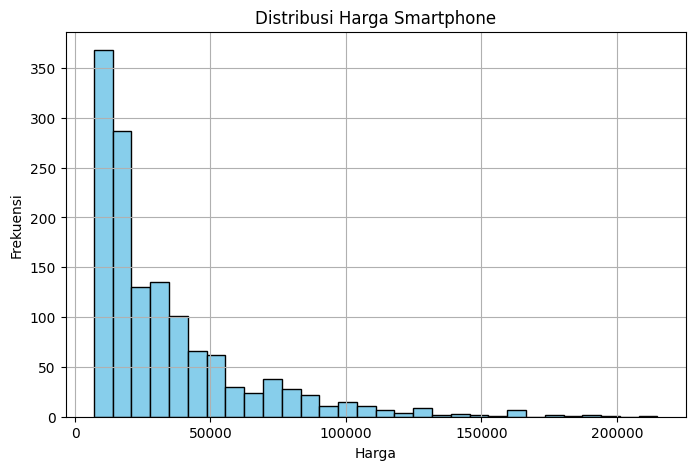

In [110]:
plt.figure(figsize=(8, 5))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Harga Smartphone')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

In [111]:
df.select_dtypes(include=object).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   No_of_sim          1370 non-null   object
 1   Camera             1370 non-null   object
 2   Screen_resolution  1370 non-null   object
 3   Processor_name     1370 non-null   object
dtypes: object(4)
memory usage: 42.9+ KB


In [112]:
df.select_dtypes(include=np.number).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          1370 non-null   float64
 1   Spec_score      1370 non-null   int64  
 2   Ram             1370 non-null   int64  
 3   Battery         1370 non-null   int64  
 4   Display         1370 non-null   float64
 5   Price           1370 non-null   int64  
 6   Inbuilt_memory  1370 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 75.1 KB


### kita buat fitur baru bedasarkan korelasi  di atas 0.6


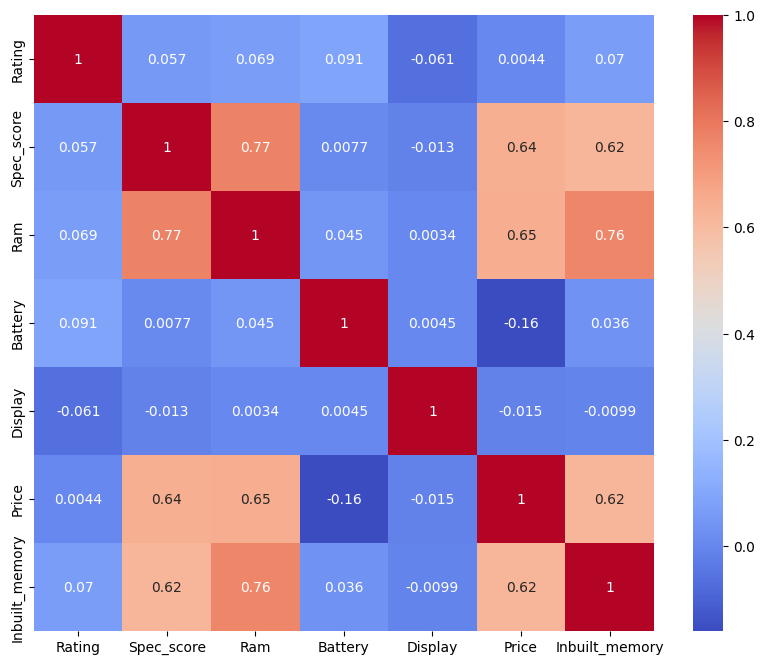

In [113]:
df_numerical = df.select_dtypes(include=[np.number])
correlation_matrix = df_numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

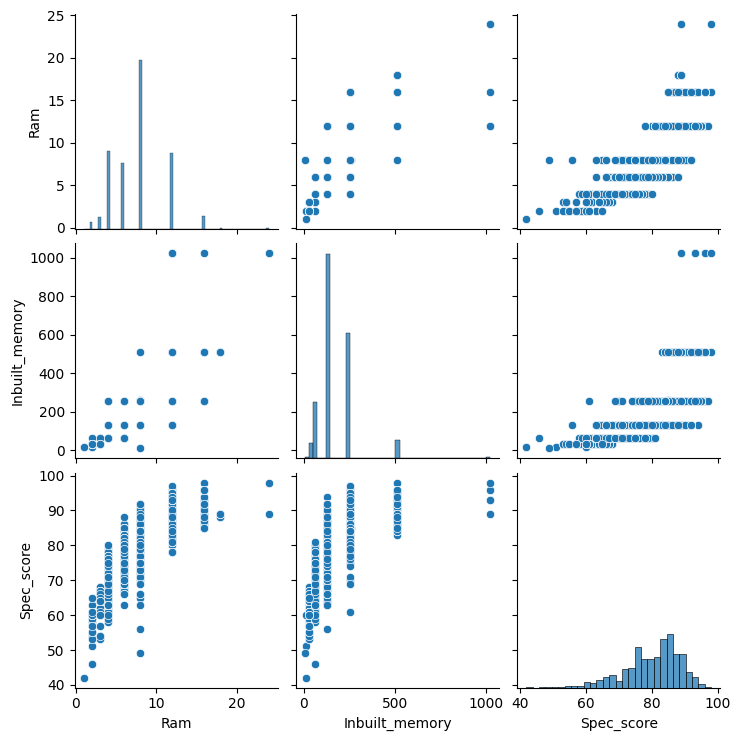

In [114]:

selected = ['Ram', 'Inbuilt_memory', 'Spec_score']
sns.pairplot(df[selected])
plt.show()

In [115]:
#Ram-Spec_score
df['Ram_SpecScore'] = df['Ram'] * df['Spec_score']
#Inbuilt_memory-Spec_score
df['InbuiltMemory_SpecScore'] = df['Inbuilt_memory'] * df['Spec_score']
#Inbuilt_memory-Ram
df['InbuiltMemory_Ram'] = df['Inbuilt_memory'] * df['Ram']

### polinomial fitur



    
lakukan Polinomial Feature kepada fitur yang memiliki hubungan non-linear kepada 'price'
fitur yang non-linear terhadap harga yaitu:
1. Ram
2. Spec Score
3. Battery

In [116]:
df['Ram_squared'] = df['Ram'] ** 2
df['Spec_score_squared'] = df['Spec_score'] ** 2
# df['Battery_kubik'] = df['Battery'] ** 3

### lakukan encode terhadap fitur kategorik menggunakan one-hot encoding

In [117]:
# One-Hot enconding
# df = df.drop(columns=['Processor_name','No_of_sim'])
df = pd.get_dummies(df, columns=['No_of_sim', 'Processor_name'], drop_first=True)


### new feature

In [118]:
def extract_camera_features(camera_str):
  if pd.isna(camera_str):
    return pd.Series([np.nan, np.nan, np.nan])

  rear_mp = re.findall(r'(\d+)\s*MP', camera_str)

  rear_count = len(rear_mp) - 1
  front_mp = rear_mp[-1] if rear_mp else np.nan
  total_rear_mp = sum(map(int, rear_mp[:-1])) if rear_mp[:-1] else np.nan


  return pd.Series([rear_count, total_rear_mp, int(front_mp) if front_mp else np.nan])

df[['rear_count', 'total_rear_mp', 'front_mp']] = df['Camera'].apply(extract_camera_features)
df['total_rear_mp'] = df['total_rear_mp'].fillna(df['total_rear_mp'].median())
df[['rear_count', 'total_rear_mp', 'front_mp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rear_count     1370 non-null   float64
 1   total_rear_mp  1370 non-null   float64
 2   front_mp       1370 non-null   float64
dtypes: float64(3)
memory usage: 32.2 KB


In [119]:
def extract_resolution(res_str):
  if pd.isna(res_str):
    return pd.Series([np.nan, np.nan])
  match = re.search(r'(\d+)\s*x\s*(\d+)', res_str)
  if match:
    width, heigt = match.groups()
    return pd.Series([int(width), int(heigt)])
  return pd.Series([np.nan, np.nan])

df[['screen_width', 'screen_heigt']] = df['Screen_resolution'].apply(extract_resolution)
df[['screen_width', 'screen_heigt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   screen_width  1370 non-null   int64
 1   screen_heigt  1370 non-null   int64
dtypes: int64(2)
memory usage: 21.5 KB


In [120]:
df_numerical = df.select_dtypes(include=[np.number])

df_numerical = df_fe.select_dtypes(include=[np.number])

for col in df_numerical.columns:
    if df_numerical[col].isnull().sum() == len(df_numerical[col]):
        continue  # Skip kolom yang semuanya NaN

    # Hitung skewness
    skewness = df_numerical[col].skew()

    # Gunakan IQR jika skewed
    if abs(skewness) > 0.5:
        Q1 = df_numerical[col].quantile(0.25)
        Q3 = df_numerical[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hitung jumlah outlier
        outliers = df_numerical[(df_numerical[col] < lower_bound) | (df_numerical[col] > upper_bound)]
        print(f"[IQR] Jumlah outlier di {col}: {len(outliers)}")

        # Replace realtime
        median_value = df_numerical[col].median()
        df_numerical[col] = df_numerical[col].apply(
            lambda x: median_value if (x < lower_bound or x > upper_bound) else x
        )

    else:
        # Gunakan Z-score untuk distribusi normal
        mean = df_numerical[col].mean()
        std = df_numerical[col].std()

        z_scores = (df_numerical[col] - mean) / std
        outliers = df_numerical[(z_scores < -3) | (z_scores > 3)]
        print(f"[Z-Score] Jumlah outlier di {col}: {len(outliers)}")

        # Replace realtime
        median_value = df_numerical[col].median()
        df_numerical[col] = df_numerical[col].where(
            (z_scores >= -3) & (z_scores <= 3), median_value
        )


outlier_report = cek_jumlah_outlier(df_numerical)
print(outlier_report)

[Z-Score] Jumlah outlier di Rating: 0
[IQR] Jumlah outlier di Spec_score: 17
[IQR] Jumlah outlier di Ram: 316
[Z-Score] Jumlah outlier di Battery: 20
[IQR] Jumlah outlier di Display: 97
[IQR] Jumlah outlier di Price: 97
[IQR] Jumlah outlier di Inbuilt_memory: 64
[IQR] Jumlah outlier di Ram_SpecScore: 58
[IQR] Jumlah outlier di InbuiltMemory_SpecScore: 64
[IQR] Jumlah outlier di InbuiltMemory_Ram: 87
[IQR] Jumlah outlier di Ram_squared: 293
[Z-Score] Jumlah outlier di Spec_score_squared: 4
Price                      71
Battery                    11
Display                     2
Rating                      0
Ram                         0
Spec_score                  0
Inbuilt_memory              0
Ram_SpecScore               0
InbuiltMemory_SpecScore     0
InbuiltMemory_Ram           0
Ram_squared                 0
Spec_score_squared          0
Name: jumlah_outlier, dtype: int64


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Columns: 302 entries, Rating to screen_heigt
dtypes: bool(283), float64(5), int64(12), object(2)
memory usage: 582.1+ KB


# **Data Modeling**

In [122]:
df.drop(columns=['Camera', 'Screen_resolution'], inplace=True)
X = df.drop(columns=['Price'])
df.select_dtypes(include=np.number).info()
# df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rating                   1370 non-null   float64
 1   Spec_score               1370 non-null   int64  
 2   Ram                      1370 non-null   int64  
 3   Battery                  1370 non-null   int64  
 4   Display                  1370 non-null   float64
 5   Price                    1370 non-null   int64  
 6   Inbuilt_memory           1370 non-null   int64  
 7   Ram_SpecScore            1370 non-null   int64  
 8   InbuiltMemory_SpecScore  1370 non-null   int64  
 9   InbuiltMemory_Ram        1370 non-null   int64  
 10  Ram_squared              1370 non-null   int64  
 11  Spec_score_squared       1370 non-null   int64  
 12  rear_count               1370 non-null   float64
 13  total_rear_mp            1370 non-null   float64
 14  front_mp                

In [123]:
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
rf = RandomForestRegressor(n_estimators=100,max_depth=None,random_state=42,n_jobs=-1)

start_time = time.time()

rf.fit(X_train, y_train)

end_time = time.time()


y_pred = rf.predict(X_test)

In [125]:
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

In [126]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
training_time = end_time - start_time
full_time = end_time - star_time

print(f"Random Forest Performance:")
print(f"MAPE  : {MAPE:.2f}%")
print(f"MSE   : {mse:.2f}")
print(f"RMSE  : {rmse:.2f}")
print(f"R²    : {r2:.4f}")
print(f"Training time: {training_time:.2f} seconds")
print(f"Full time: {full_time:.2f} seconds")
print(f"🔹 R² Train : {r2_train:.3f}")
print(f"🔹 R² Test  : {r2_test:.3f}")

Random Forest Performance:
MAPE  : 19.40%
MSE   : 121012544.18
RMSE  : 11000.57
R²    : 0.8658
Training time: 0.16 seconds
Full time: 69.56 seconds
🔹 R² Train : 0.972
🔹 R² Test  : 0.866


In [127]:
results_df = pd.DataFrame({
    'Actual Values': y_test.values,
    'Predicted Values': y_pred
})

results_df.head(10)

,Actual Values,Predicted Values
0,28999,42767.090000
1,30999,22060.093667
2,72999,72977.550000
3,27990,26647.590000
4,11990,9739.820000
5,39990,87494.600000
6,56990,46732.960000
7,8199,10334.161667
8,59999,43367.463333
9,10999,12760.755000


In [128]:
with open ('rf_model.pkl', 'wb') as f:
  pickle.dump(rf, f)